In [14]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random


In [15]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [16]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [17]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


In [18]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [19]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [20]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.139583334 W= 0.38954413 b= -0.20532796
Epoch: 0100 cost= 0.132347703 W= 0.3812207 b= -0.14544915
Epoch: 0150 cost= 0.125947848 W= 0.37339216 b= -0.08913154
Epoch: 0200 cost= 0.120287262 W= 0.36602926 b= -0.03616338
Epoch: 0250 cost= 0.115280591 W= 0.35910422 b= 0.013654474
Epoch: 0300 cost= 0.110852338 W= 0.35259113 b= 0.06050937
Epoch: 0350 cost= 0.106935717 W= 0.3464654 b= 0.10457757
Epoch: 0400 cost= 0.103471644 W= 0.34070396 b= 0.14602469
Epoch: 0450 cost= 0.100407787 W= 0.3352852 b= 0.18500692
Epoch: 0500 cost= 0.097698040 W= 0.3301887 b= 0.22167066
Epoch: 0550 cost= 0.095301427 W= 0.32539532 b= 0.25615418
Epoch: 0600 cost= 0.093181804 W= 0.3208871 b= 0.28858644
Epoch: 0650 cost= 0.091307193 W= 0.3166468 b= 0.31909022
Epoch: 0700 cost= 0.089649335 W= 0.3126589 b= 0.347779
Epoch: 0750 cost= 0.088183083 W= 0.3089081 b= 0.3747623
Epoch: 0800 cost= 0.086886391 W= 0.30538025 b= 0.40014103
Epoch: 0850 cost= 0.085739680 W= 0.3020625 b= 0.42400914
Epoch: 0900 cost= 0.0

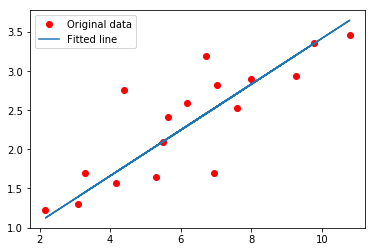

In [22]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()